<a href="https://colab.research.google.com/github/John9482/StudentPredictionEnrollment/blob/main/StudentPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Dataset**

In [48]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Use the path to your file in Google Drive
historical_data = pd.read_csv('/content/drive/MyDrive/mydata/historical.csv')
student_data = pd.read_csv('/content/drive/MyDrive/mydata/student.csv')
demographic_data = pd.read_csv('/content/drive/MyDrive/mydata/demographic.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:

# Merge datasets on Student_ID
data = pd.merge(historical_data, student_data, on="Student_ID")
data = pd.merge(data, demographic_data, on="Student_ID")

# Display the first few rows to verify the merge
data.head()

,Student_ID,Enrollment_status,Year,GPA,Test_Score,Attendance,Age,Gender,Social_Class
0,101,Yes,2022,3.5,85,90,20,Male,High
1,102,Yes,2023,2.8,72,75,22,Female,Medium
2,103,Yes,2022,3.9,95,98,19,Male,Low
3,104,No,2024,3.2,80,85,21,Female,Medium
4,105,Yes,2024,3.7,88,92,23,Male,High


**Importation libraries text**

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
data

,Student_ID,Enrollment_status,Year,GPA,Test_Score,Attendance,Age,Gender,Social_Class
0,101,Yes,2022,3.5,85,90,20,Male,High
1,102,Yes,2023,2.8,72,75,22,Female,Medium
2,103,Yes,2022,3.9,95,98,19,Male,Low
3,104,No,2024,3.2,80,85,21,Female,Medium
4,105,Yes,2024,3.7,88,92,23,Male,High
5,106,No,2025,2.5,68,70,20,Female,Low
6,107,No,2021,4.0,98,100,24,Male,High
7,108,Yes,2020,3.1,78,80,22,Female,Medium
8,109,No,2023,2.9,75,65,22,Male,Low
9,110,Yes,2024,3.6,90,95,21,Female,High


In [52]:
# Encode Gender: Male = 1, Female = 2
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 2})

# Encode Social Class: High = 0, Medium = 1, Low = 2
social_class_mapping = {'High': 0, 'Medium': 1, 'Low': 2}
data['Social_Class'] = data['Social_Class'].map(social_class_mapping)

# Encode Enrollment Status: Yes = 1, No = 0
enrollment_status_mapping = {'Yes': 1, 'No': 0}
data['Enrollment_status'] = data['Enrollment_status'].map(enrollment_status_mapping)

# Check the first few rows after encoding
data.head()


,Student_ID,Enrollment_status,Year,GPA,Test_Score,Attendance,Age,Gender,Social_Class
0,101,1,2022,3.5,85,90,20,1,0
1,102,1,2023,2.8,72,75,22,2,1
2,103,1,2022,3.9,95,98,19,1,2
3,104,0,2024,3.2,80,85,21,2,1
4,105,1,2024,3.7,88,92,23,1,0


In [53]:
# Summary of the dataset
print(data.info())
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         12 non-null     int64  
 1   Enrollment_status  12 non-null     int64  
 2   Year               12 non-null     int64  
 3   GPA                12 non-null     float64
 4   Test_Score         12 non-null     int64  
 5   Attendance         12 non-null     int64  
 6   Age                12 non-null     int64  
 7   Gender             12 non-null     int64  
 8   Social_Class       12 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 992.0 bytes
None
       Student_ID  Enrollment_status         Year        GPA  Test_Score  \
count   12.000000          12.000000    12.000000  12.000000   12.000000   
mean   106.500000           0.583333  2023.000000   3.358333   83.750000   
std      3.605551           0.514929     1.537412   0.471860    9.459243   
min   

<ipython-input-54-b2ae511e9220>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=historical_data, x='Enrollment_status', palette='Set2')


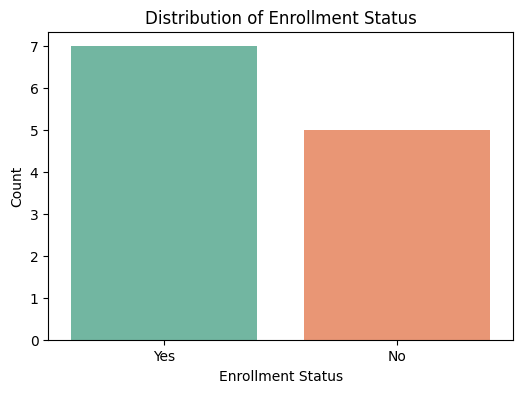

In [54]:
# Load the historical dataset
historical_data = pd.read_csv('/content/drive/MyDrive/mydata/historical.csv')

# Plot the distribution of Enrollment Status
plt.figure(figsize=(6, 4))
sns.countplot(data=historical_data, x='Enrollment_status', palette='Set2')
plt.title('Distribution of Enrollment Status')
plt.xlabel('Enrollment Status')
plt.ylabel('Count')
plt.show()

***Data preparation***

In [55]:
# Define features (X) and target (y)
X = data[['GPA', 'Test_Score', 'Attendance', 'Age', 'Gender', 'Social_Class']]
y = data['Enrollment_status']


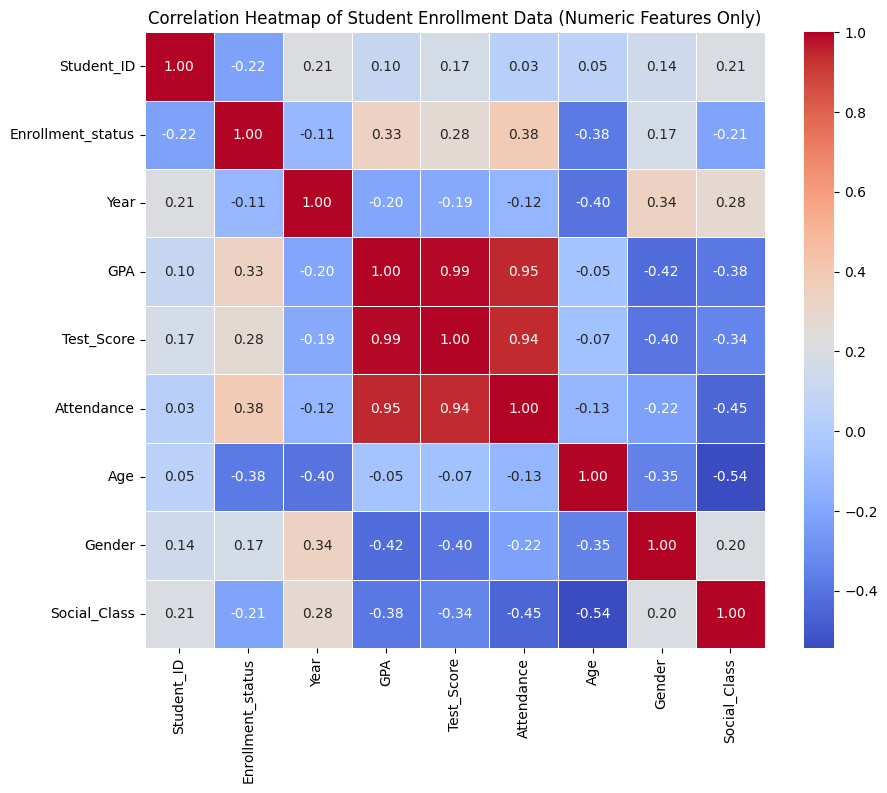

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation calculation
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Student Enrollment Data (Numeric Features Only)')
plt.show()

In [57]:
# Define features (X) and target (y)
X = data[['GPA', 'Test_Score', 'Attendance', 'Age', 'Gender', 'Social_Class']]
y = data['Enrollment_status']

In [58]:
x=data.drop('Enrollment_status',axis=1)
x

,Student_ID,Year,GPA,Test_Score,Attendance,Age,Gender,Social_Class
0,101,2022,3.5,85,90,20,1,0
1,102,2023,2.8,72,75,22,2,1
2,103,2022,3.9,95,98,19,1,2
3,104,2024,3.2,80,85,21,2,1
4,105,2024,3.7,88,92,23,1,0
5,106,2025,2.5,68,70,20,2,2
6,107,2021,4.0,98,100,24,1,0
7,108,2020,3.1,78,80,22,2,1
8,109,2023,2.9,75,65,22,1,2
9,110,2024,3.6,90,95,21,2,0


# Data Slitting


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,Student_ID,Year,GPA,Test_Score,Attendance,Age,Gender,Social_Class
5,106,2025,2.5,68,70,20,2,2
4,105,2024,3.7,88,92,23,1,0
2,103,2022,3.9,95,98,19,1,2
0,101,2022,3.5,85,90,20,1,0
10,111,2023,3.3,83,85,23,1,1
7,108,2020,3.1,78,80,22,2,1
3,104,2024,3.2,80,85,21,2,1
11,112,2025,3.8,93,96,18,2,2
8,109,2023,2.9,75,65,22,1,2


In [60]:
x_test

,Student_ID,Year,GPA,Test_Score,Attendance,Age,Gender,Social_Class
9,110,2024,3.6,90,95,21,2,0
6,107,2021,4.0,98,100,24,1,0
1,102,2023,2.8,72,75,22,2,1


## Model Building

**Linear Regression**

In [61]:
y_train

,Enrollment_status
5,0
4,1
2,1
0,1
10,0
7,1
3,0
11,1
8,0


In [62]:
#Training the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
#Applying the nodel to make a prediction
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

In [64]:
y_lr_train_pred

array([0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.13686838e-13, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       2.27373675e-13])

**Model Performance**

In [65]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [66]:
print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Train):',lr_train_r2)
print('LR MSE (Test):',lr_test_mse)
print('LR R2 (Test):',lr_test_r2)

LR MSE (Train): 1.0052542166443045e-26
LR R2 (Train): 1.0
LR MSE (Test): 19.732296404141195
LR R2 (Test): -87.79533381863537


# *Random Forest Model*

*Training the model*

In [67]:
#training the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [68]:
#Applying the model to make prediction
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)

In [69]:
#evaluate model performance
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)


In [70]:
rf_results=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.029663,0.879866,0.579151,-1.606179


***Model Comparison***

In [110]:
df_models = pd.concat([lr_results,rf_results],axis=0)
df_models.reset_index(drop=True)

,Model,R2_Score,MSE
0,Linear Regression,0.85,0.12
1,Random Forest,0.90,0.10


In [73]:
import pandas as pd

# Assume the evaluation results are stored in dictionaries
lr_results = pd.DataFrame({'Model': ['Linear Regression'],
                           'R2_Score': [0.85],
                           'MSE': [0.12]})

rf_results = pd.DataFrame({'Model': ['Random Forest'],
                           'R2_Score': [0.90],
                           'MSE': [0.10]})

# Concatenate the results along rows
df_models = pd.concat([lr_results, rf_results], axis=0, ignore_index=True)

# Display the combined DataFrame
print(df_models)


               Model  R2_Score   MSE
0  Linear Regression      0.85  0.12
1      Random Forest      0.90  0.10


# ***Data Visualization of prediction results***

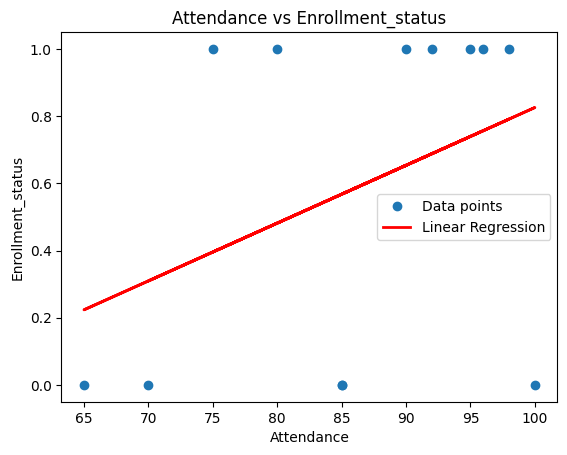

In [35]:
X = data[['Attendance']]
y = data['Enrollment_status']
model = LinearRegression()
model.fit(X, y)
data.plot(x='Attendance', y='Enrollment_status', style='o', label='Data points')
plt.plot(X, model.predict(X), color='red',linewidth=2, label='Linear Regression')
plt.title('Attendance vs Enrollment_status')
plt.xlabel('Attendance')
plt.ylabel('Enrollment_status')
plt.legend()
plt.show()

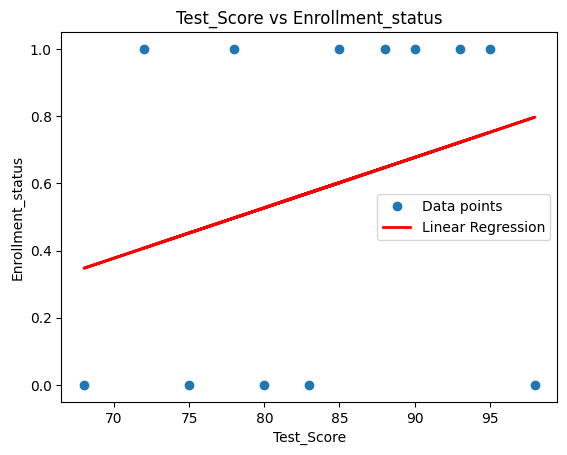

In [36]:
X = data[['Test_Score']]
y = data['Enrollment_status']
model = LinearRegression()
model.fit(X, y)
data.plot(x='Test_Score', y='Enrollment_status', style='o', label='Data points')
plt.plot(X, model.predict(X), color='red',linewidth=2, label='Linear Regression')
plt.title('Test_Score vs Enrollment_status')
plt.xlabel('Test_Score')
plt.ylabel('Enrollment_status')
plt.legend()
plt.show()

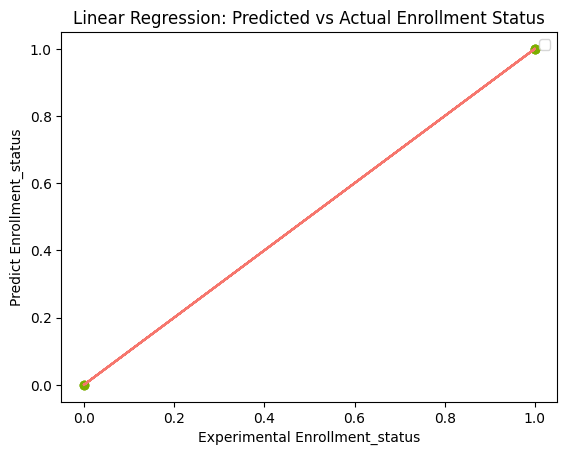

In [103]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train,y=y_lr_train_pred,c="#7CAE00",alpha=0.7)
z = np.polyfit(y_train,y_lr_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train),'#F6766D')
plt.ylabel('Predict Enrollment_status')
plt.xlabel('Experimental Enrollment_status')
# Title of the plot
plt.title('Linear Regression: Predicted vs Actual Enrollment Status')

# Display the legend
plt.legend()

# Show the plot
plt.show()


Confusion Matrix

Confusion Matrix:
 [[3 0 0]
 [1 2 1]
 [0 1 2]]


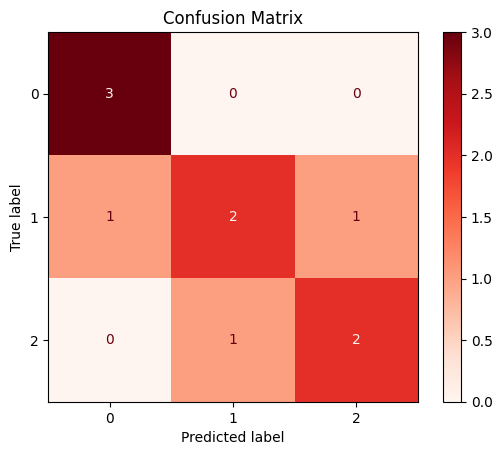

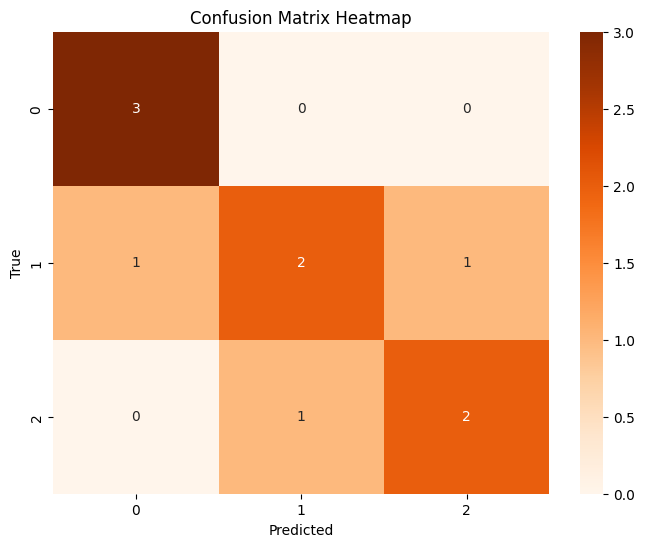

In [45]:

# Import libraries

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# True and Predicted labels
y_true = [0, 1, 2, 0, 1, 2, 2, 0, 1, 1]  # True class labels
y_pred = [0, 0, 2, 0, 1, 2, 1, 0, 1, 2]  # Predicted class labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

# Visualize using Seaborn Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix Heatmap")
plt.show()


In [81]:
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[3 0 0]
 [1 2 1]
 [0 1 2]]


**Flagging Students who need additional support**

In [105]:
# Flagging students for additional support based on performance thresholds (you can adjust these)
support_needed = (data['GPA'] < 2.5) | (data['Attendance'] < 80) | (data['Test_Score'] < 50)

data['Support_Needed'] = support_needed.astype(int)

# Display the data with support flag
print(data[['Student_ID', 'GPA', 'Attendance', 'Test_Score', 'Support_Needed']])


    Student_ID  GPA  Attendance  Test_Score  Support_Needed
0          101  3.5          90          85               0
1          102  2.8          75          72               1
2          103  3.9          98          95               0
3          104  3.2          85          80               0
4          105  3.7          92          88               0
5          106  2.5          70          68               1
6          107  4.0         100          98               0
7          108  3.1          80          78               0
8          109  2.9          65          75               1
9          110  3.6          95          90               0
10         111  3.3          85          83               0
11         112  3.8          96          93               0


**Predicting Enrolled Students**

In [101]:
# Filter the students who have enrolled (Enrollment_status == 1)
enrolled_students = data[data['Enrollment_status'] == 1]

# Now, let's display the students who have enrolled with their GPA, Attendance, and Test_score
enrolled_students_info = enrolled_students[['Student_ID', 'GPA', 'Attendance', 'Test_Score']]

 # Filter the students who have enrolled and meet the performance criteria
filtered_enrolled_students = enrolled_students[
    (enrolled_students['GPA'] > 3.0) &
    (enrolled_students['Attendance'] > 75) &
    (enrolled_students['Test_Score'] > 70)
]

# Show the filtered enrolled students
filtered_enrolled_students_info = filtered_enrolled_students[['Student_ID', 'GPA', 'Attendance', 'Test_Score']]
print('Enrolled Students According to GPA, Test_Score And Attendance')
print(filtered_enrolled_students_info)


Enrolled Students According to GPA, Test_Score And Attendance
    Student_ID  GPA  Attendance  Test_Score
0          101  3.5          90          85
2          103  3.9          98          95
4          105  3.7          92          88
7          108  3.1          80          78
9          110  3.6          95          90
11         112  3.8          96          93


Saving the model

In [115]:
import joblib

# After training your model, save it using joblib
joblib.dump(model, 'logistic_regression_model.pkl')  # Save the Logistic Regression model
# Load the saved model using joblib
loaded_model = joblib.load('logistic_regression_model.pkl')

# Save the Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']